italicized text

In [1]:
#%% 
#@title Viscoporoelastic model

import sys
print(sys.version)

import numpy as np

# for below must mount drive
#from google.colab import drive
#drive.mount('/content/drive')
new_path = "/content/drive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code"
if new_path not in sys.path:
  sys.path.insert(0,new_path)



3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

from src.euler_inversion import euler_inversion
from src import plotting
from src import viscoporoelastic_model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

Time taken in sec: 0.05659604072570801


,Value,Category
eps0,0.10,Constant
strain_rate,0.10,Constant
Vrz,0.24,Constant
Ezz,19.19,Constant
c,0.00,FittedParam
tau1,0.00,FittedParam
tau2,0.00,FittedParam
tg,40.62,FittedParam
Vrtheta,0.75,FittedParam
Err,8.49,FittedParam


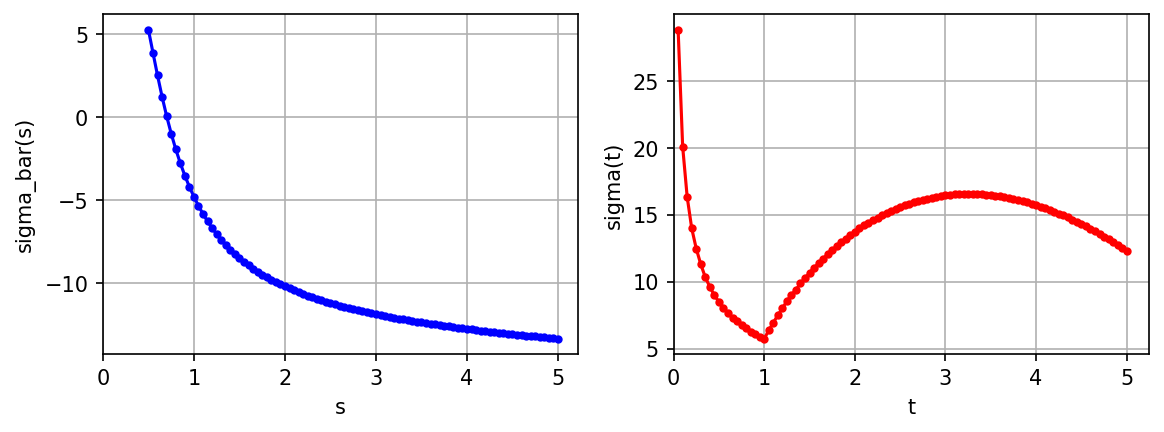

In [4]:
#%%
from src.viscoporoelastic_model import ViscoporoelasticModel
#%%
import time as timer
t1=timer.time();

#@markdown Predefined constants
ViscoporoelasticModel.eps0 = 0.1 #@param {type:"number"} ; # 10 percent
ViscoporoelasticModel.strain_rate = 0.1 #@param {type:"number"} ; # 1 percent per s (normally 1#/s)
## Below are directly determined by the mesh deformation part of the
## experiment (see our paper with Daniel).  -Dr. Spector
ViscoporoelasticModel.Vrz = 0.24 #@param {type:"number"} ; # Not actually v, but greek nu (represents Poisson's ratio)
ViscoporoelasticModel.Ezz =   19.19#@param {type:"number"} ; # Note- don't mix up Ezz with epszz

vpe = ViscoporoelasticModel()

#@markdown Fitted parameters (to be determined by experimental fitting to the unknown material)
## Fitted parameters (to be determined by experimental fitting to
# the unknown material)
vpe.c =   0#@param {type:"number"} ;
vpe.tau1 =  0#@param {type:"number"} ;
vpe.tau2 =  0#@param {type:"number"} ;
#tau = [tau1, tau2];
#tau = [1 1];
vpe.tg=40.62 #@param {type:"number"}; #in units of s   # for porosity_sp == 0.5
vpe.Vrtheta =  0.75#@param {type:"number"}; # Not actually v, but greek nu (represents Poisson's ratio)
vpe.Err =  8.49#@param {type:"number"};

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
times=np.array([2,3])
times = np.arange(0.05, 5.05, 0.05)
input_times = times
plot_times  = times
func = vpe.laplace_value
func_name = {"t":"sigma(t)", "s":"sigma_bar(s)"}
x_names   = {"t":"t", "s":"s"}
s_vals = np.arange(0.5, 5.05, 0.05)

import time as timer
t1=timer.time();
inverted_vals=euler_inversion(func, input_times)
t2=timer.time()-t1
print("Time taken in sec:", t2)

#%%
# Non-positive s values give an error "invalid value encountered in sqrt"
laplace_vals = func(s_vals)

##%%
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)
fig.set_figwidth(9)
fig.set_figheight(3)
fig.set_dpi(150)

axs[0].plot(s_vals, laplace_vals, ".-b")
axs[0].set_xlabel(x_names["s"])
# theoretically, there should be no limit on s, but non-positive values throw an error in the function
axs[0].set_xlim([0, None])
axs[0].set_ylabel(func_name["s"])
axs[0].grid()

axs[1].plot(plot_times, inverted_vals, ".-r")
axs[1].set_xlabel(x_names["t"])
axs[1].set_xlim([0, None])
axs[1].set_ylabel(func_name["t"])    
axs[1].grid()

#axs[0].show()

fig.show()


# Print out the used values
vpe.get_predefined_constants()
import pandas as pd
x1=np.arange(10)
y1=np.random.random(10)
x2=np.arange(4,12)
y2=np.random.random(8)
df1 = pd.DataFrame({'Constant':ViscoporoelasticModel.get_predefined_constant_names(),'Value':ViscoporoelasticModel.get_predefined_constants()})
df2 = pd.DataFrame({'Fitted':vpe.get_fitted_parameter_names(),'Value':vpe.get_fitted_parameters()})
df3 = pd.DataFrame({'Value':ViscoporoelasticModel.get_predefined_constants()+vpe.get_fitted_parameters(),"Category":ViscoporoelasticModel.get_var_categories()}, index=ViscoporoelasticModel.get_predefined_constant_names()+vpe.get_fitted_parameter_names())
df3

Yuan, D., Somers, S.M., Grayson, W.L. et al. A Poroelastic Model of a Fibrous-Porous Tissue Engineering Scaffold. Sci Rep 8, 5043 (2018). https://doi.org/10.1038/s41598-018-23214-8

# Figure 1
<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-018-23214-8/MediaObjects/41598_2018_23214_Fig1_HTML.jpg?as=webp">

# Table 1
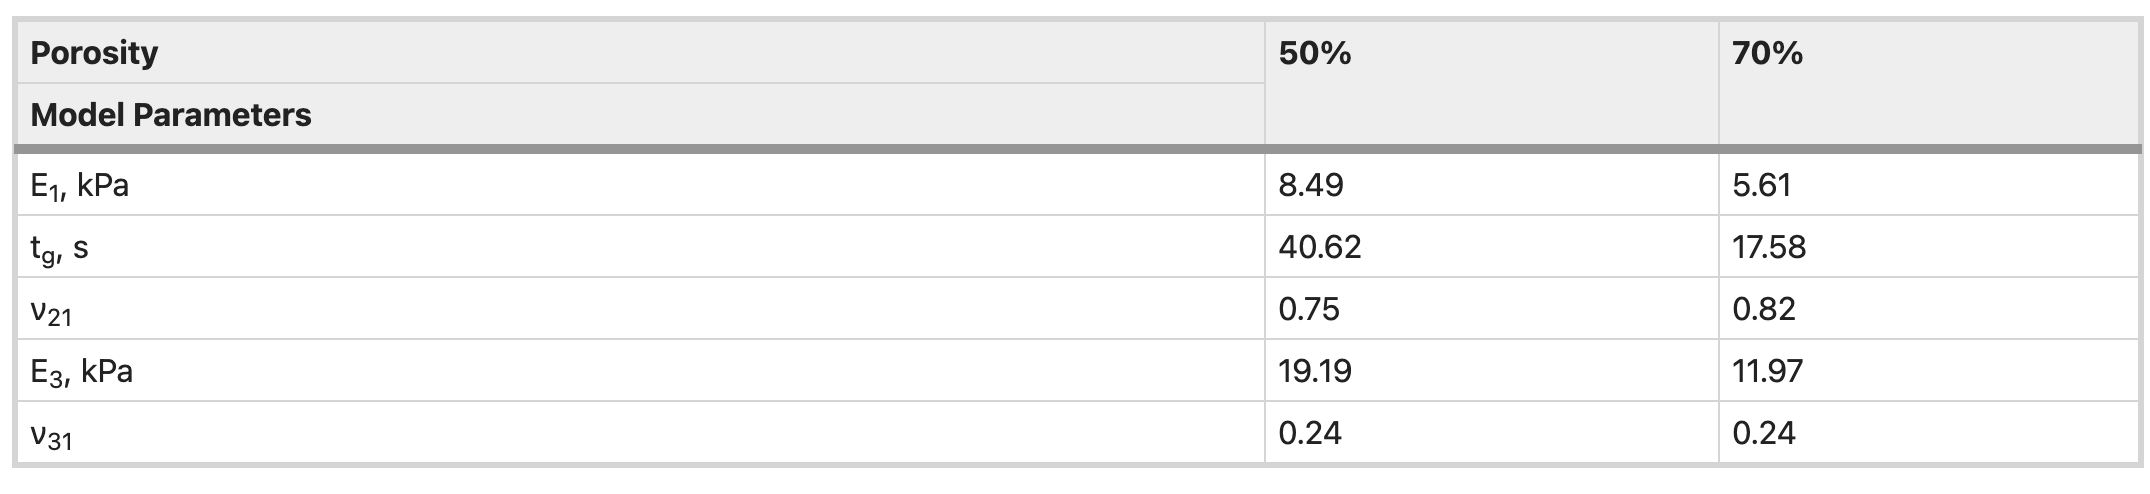

Time taken in sec: 0.015203237533569336
       alpha     tg  strain_rate      t0
value    0.5  0.007       0.0001  1000.0


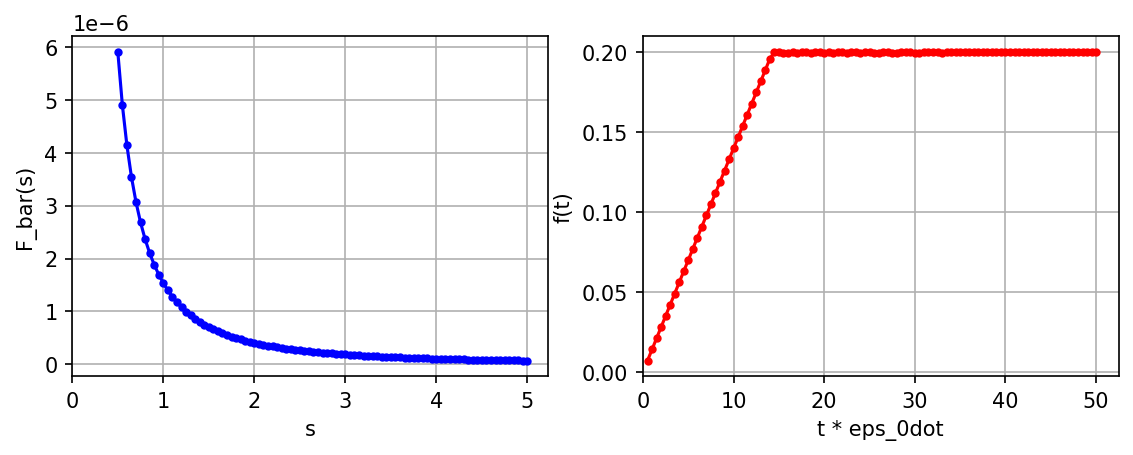

In [5]:

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
times=np.array([2,3])
times = np.arange(0.05, 5.05, 0.05)*100000

tm = viscoporoelastic_model.TestModel()
func = tm.laplace_value
input_times = times
plot_times  = times * tm.strain_rate
func_name = {"t":"f(t)", "s":"F_bar(s)"}
x_names   = {"t":"t * eps_0dot", "s":"s"}
s_vals = np.arange(0.5, 5.05, 0.05)


import time as timer
t1=timer.time();
inverted_vals=euler_inversion(func, input_times)
t2=timer.time()-t1
print("Time taken in sec:", t2)

#%%
# Non-positive s values give an error "invalid value encountered in sqrt"
laplace_vals = func(s_vals)

##%%
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)
fig.set_figwidth(9)
fig.set_figheight(3)
fig.set_dpi(150)

axs[0].plot(s_vals, laplace_vals, ".-b")
axs[0].set_xlabel(x_names["s"])
# theoretically, there should be no limit on s, but non-positive values throw an error in the function
axs[0].set_xlim([0, None])
axs[0].set_ylabel(func_name["s"])
axs[0].grid()

axs[1].plot(plot_times, inverted_vals, ".-r")
axs[1].set_xlabel(x_names["t"])
axs[1].set_xlim([0, None])
axs[1].set_ylabel(func_name["t"])    
axs[1].grid()

#axs[0].show()

fig.show()

vars={key:value for key,value in viscoporoelastic_model.TestModel.__dict__.items() if not key.startswith("__") and not callable(value)}
print(pd.DataFrame(vars,index=["value"]))

Time taken in sec: 0.10617232322692871


,t/tg,f(t)_Numerical,f(t)_Analytic
0,0.01,-0.002882,-0.587811
1,0.02,-0.002831,-0.558588
2,0.03,-0.002790,-0.535413
3,0.04,-0.002756,-0.516464
4,0.05,-0.002725,-0.500551
...,...,...,...
394,3.95,-0.002000,-0.198084
395,3.96,-0.002000,-0.198081
396,3.97,-0.002000,-0.198078
397,3.98,-0.002000,-0.198075


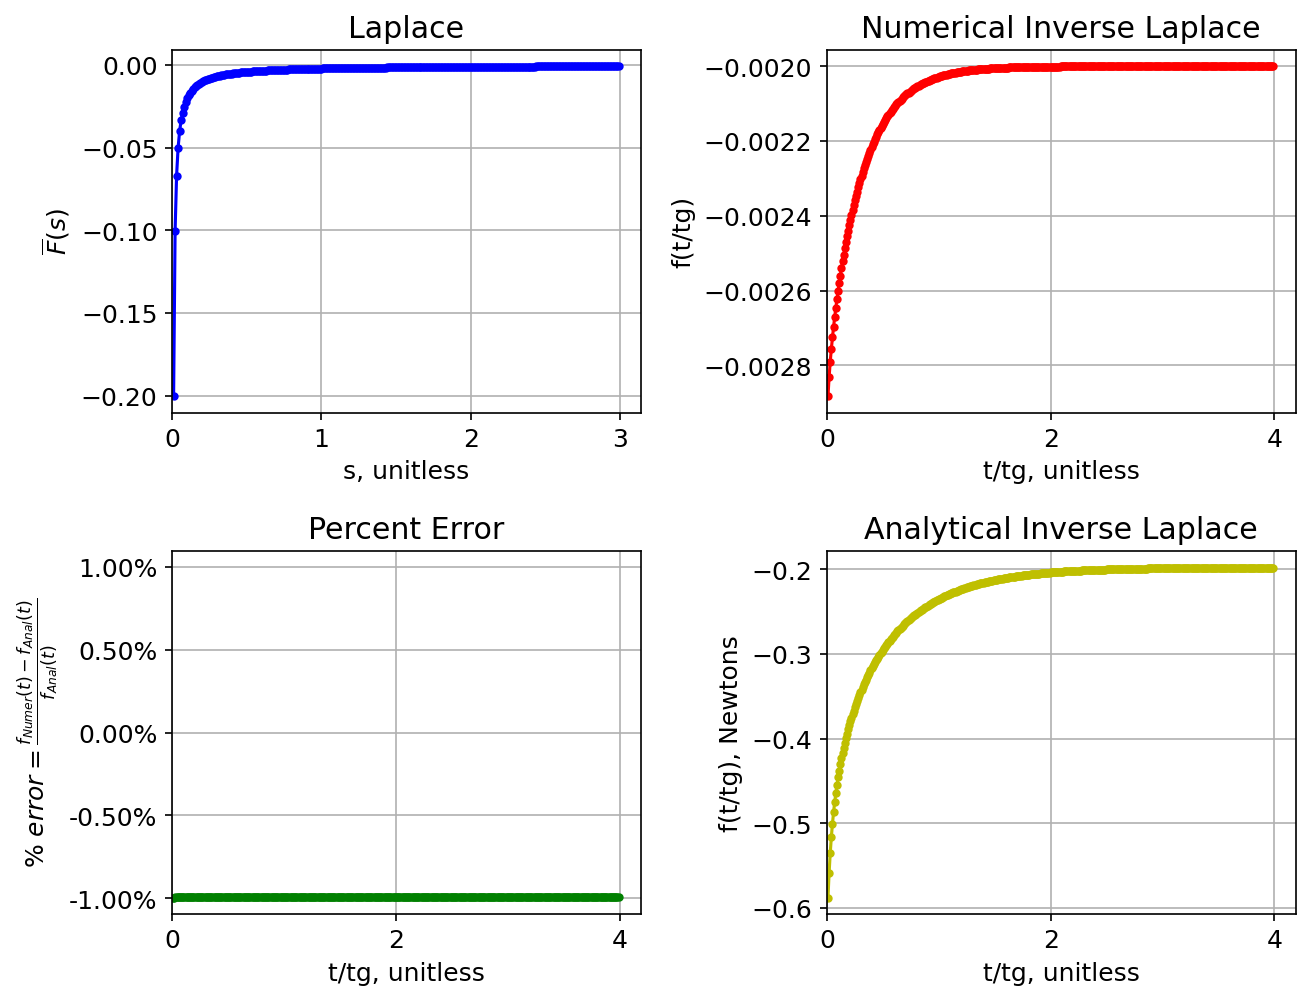

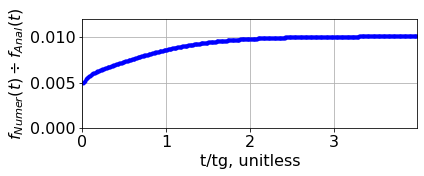

In [7]:
import importlib

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

#anal_offset = 1/7000.0 #0.0001
anal_offset = 1



tm = viscoporoelastic_model.TestModel2()
tg = tm.tg

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#times=np.arange(0.1,100,0.1)/100.0
#times = np.arange(0.05, 5.05, 0.05)
#times=np.arange(0.001,2,0.01)
times=np.arange(100,7000*4,100)
times=np.arange(0.01,4,0.01)*tg

func = tm.laplace_value 
#func = lambda s: tm.laplace_value(s)*s
input_times = times
plot_times  = times/tg 
func_name = {"t":"f(t/tg)", "s":r"$\overline{F}(s)$","t_anal":f"f(t/tg), {tm.inverted_value_units()}"}
#func_name = {"t":"f(t/tg)", "s":r"$s\cdot\overline{F}(s)$","t_anal":f"f(t/tg), {tm.inverted_value_units()}"}
#func_name = {"t":"f(t)", "s":"F_bar(s)","t_anal":"f(t*0.01)*0.01"}
x_names   = {"t":"t/tg, unitless", "s":"s, unitless","t_anal":"t/tg, unitless"}
s_vals = np.arange(0.01, 3.0, 0.01)
inv_func_anal = tm.inverted_value #lambda t: tm.inverted_value(t*0.01)*0.01
#inv_func_anal = lambda t: tm.inverted_value(t/0.00001)/100
#inv_func_anal = lambda t: tm.inverted_value(t)/100
input_times_anal = input_times /anal_offset
plot_times_anal = plot_times /anal_offset

plt.rc('font', size=12)  # default font size is 10
fig, laplace_vals, inverted_vals_numerical, inverted_vals_analytical=plotting.plot_laplace_analysis(
    func=func, func_name=func_name, x_names=x_names, s_vals=s_vals, 
    input_times=input_times, plot_times=plot_times, tg=tg,
    input_times_anal=input_times_anal, plot_times_anal=plot_times_anal, 
    inv_func_anal=inv_func_anal, Marg=32 )


plt.figure(figsize=(6, 2))
plt.rc('font', size=16)  # default font size is 10
plt.grid()
plt.plot(plot_times,inverted_vals_numerical/inverted_vals_analytical, ".-b")
#plt.plot(inverted_vals_numerical,inverted_vals_analytical)
plt.xlim([0, max(plot_times)])
plt.ylim([0, 0.012])
plt.xlabel("t/tg, unitless")
#plt.ylabel(r"$\frac{f_{Numer}(t)}{f_{Anal}(t)}$")
plt.ylabel(r"$f_{Numer}(t) \div f_{Anal}(t)$")

#vars={key:value for key,value in viscoporoelastic_model.TestModel2.__dict__.items() if not key.startswith("__") and not callable(value)}
#print(pd.DataFrame(vars,index=["value"]))

#print(inverted_vals_numerical)

# creating a DataFrame
dict = {'t/tg' : plot_times,
        'f(t)_Numerical' : inverted_vals_numerical,
        'f(t)_Analytic' : inverted_vals_analytical}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
display(df)

In [ ]:
import importlib

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

#anal_offset = 1/7000.0 #0.0001
anal_offset = 1

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#times=np.arange(0.1,100,0.1)/100.0
#times = np.arange(0.05, 5.05, 0.05)
#times=np.arange(0.001,2,0.01)
times=np.arange(100,7000*4,100)
times=np.arange(0.01,4,0.01)*tg

tm = viscoporoelastic_model.TestModel3()
tg = tm.tg
func = tm.laplace_value 
#func = lambda s: tm.laplace_value(s)*s
input_times = times
plot_times  = times/tg 
func_name = {"t":"f(t/tg)", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
#func_name = {"t":"f(t/tg)", "s":r"$s\cdot\overline{F}(s)$","t_anal":f"f(t/tg), {tm.inverted_value_units()}"}
#func_name = {"t":"f(t)", "s":"F_bar(s)","t_anal":"f(t*0.01)*0.01"}
x_names   = {"t":"t/tg, unitless", "s":"s, unitless","t_anal":"t/tg, unitless"}
s_vals = np.arange(0.01, 3.0, 0.01)
inv_func_anal = tm.inverted_value #lambda t: tm.inverted_value(t*0.01)*0.01
#inv_func_anal = lambda t: tm.inverted_value(t/0.00001)/100
#inv_func_anal = lambda t: tm.inverted_value(t)/100
input_times_anal = input_times /anal_offset
plot_times_anal = plot_times /anal_offset

plt.rc('font', size=12)  # default font size is 10
fig, laplace_vals, inverted_vals_numerical, inverted_vals_analytical=plotting.plot_laplace_analysis(
    func=func, func_name=func_name, x_names=x_names, s_vals=s_vals, 
    input_times=input_times, plot_times=plot_times, tg=tg,
    input_times_anal=input_times_anal, plot_times_anal=plot_times_anal, 
    inv_func_anal=inv_func_anal, Marg=32 )


plt.figure(figsize=(6, 2))
plt.rc('font', size=16)  # default font size is 10
plt.grid()
plt.plot(plot_times,inverted_vals_numerical/inverted_vals_analytical, ".-b")
#plt.plot(inverted_vals_numerical,inverted_vals_analytical)
plt.xlim([0, max(plot_times)])
plt.ylim([0, 0.012])
plt.xlabel("t/tg, unitless")
#plt.ylabel(r"$\frac{f_{Numer}(t)}{f_{Anal}(t)}$")
plt.ylabel(r"$f_{Numer}(t) \div f_{Anal}(t)$")

In [ ]:
anal_offset = 1
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
times=np.arange(0.1,100,0.1)/10000.0*10*anal_offset
times=np.arange(0.1,100,0.1)/100.0*10*anal_offset

#tm = TestModel2()
a=-3.03
#func = lambda s: 1/(s-a)
func = lambda s: 1/(s-a)
inv_func_anal = lambda t: np.exp(a*t)

input_times = times
plot_times  = times
func_name = {"t":"f(t)", "s":"F(s)"}
x_names   = {"t":"t", "s":"s"}
s_vals = np.arange(0.05, 5.05, 0.05)
input_times_anal = input_times /anal_offset
plot_times_anal = plot_times /anal_offset


fig=plotting.plot_laplace_analysis(func=func, func_name=func_name, tg=1, x_names=x_names, s_vals=s_vals, input_times=input_times, plot_times=plot_times, input_times_anal=input_times_anal, plot_times_anal=plot_times_anal, inv_func_anal=inv_func_anal )


# Laplace function relevant properties  
## Sources:
*   https://lpsa.swarthmore.edu/LaplaceXform/FwdLaplace/LaplaceProps.html
*   https://lpsa.swarthmore.edu/LaplaceZTable/Common%20Laplace%20Transform%20Pairs.pdf

## Properties:  
1. Initial Value Theorem   
image.png

1. Final Value Theorem   
image.png

1. Time scaling.  
![image.png](https://lpsa.swarthmore.edu/LaplaceXform/FwdLaplace/Funcs/imgB1.gif)

1. Multiplication by time.  
![image.png](https://lpsa.swarthmore.edu/LaplaceXform/FwdLaplace/Funcs/imgAF.gif)

In [ ]:
print(viscoporoelastic_model.TestModel2.tg)
print(f"{np.round(1/0.0001)}-{np.round(1/0.00001)}")

4.874666777070161
bessel_len=100000
	t=0.0, tg=7000.0, t/tg=0.0000


,N,α^2,diff,N*pi-α^2,exp(-α^2*t/tg)/(α^2-1),Sum so far
0,1,1.841184,None,1.300409,1.188801,1.188801
1,2,5.331443,3.49026,0.951743,0.230870,1.419671
2,3,8.536316,3.20487,0.888462,0.132691,1.552362
3,4,11.706005,3.16969,0.860366,0.093406,1.645767
4,5,14.863589,3.15758,0.844375,0.072131,1.717899
...,...,...,...,...,...,...
99995,99996,314145.913587,3.14159,0.785401,0.000003,4.874654
99996,99997,314149.055180,3.14159,0.785401,0.000003,4.874657
99997,99998,314152.196773,3.14159,0.785401,0.000003,4.874660
99998,99999,314155.338365,3.14159,0.785401,0.000003,4.874664


3.628


Text(0.5, 1.0, 'For t/tg=0.0')

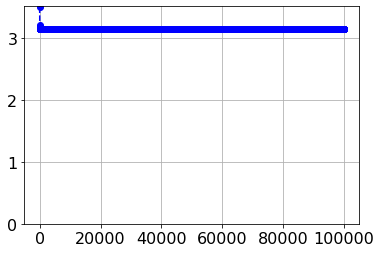

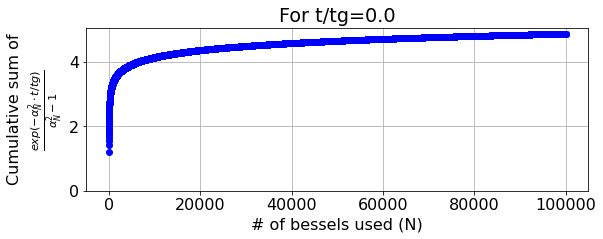

In [38]:
#import scipy.special as sp
import scipy.special
import scipy as sp
import pandas as pd

self = viscoporoelastic_model.TestModel3()
vs, tg, Es, eps0, a = type(self).get_predefined_constants()
bessel_len=100000
off=0
t=0.000*tg


def I0(x): return scipy.special.iv(0, x) #return np.i0(x); #besseli(0, x)
def I1(x): return scipy.special.iv(1, x) #besseli(1, x)
def J0(x): return scipy.special.jv(0, x)
def J1(x): return scipy.special.jv(1, x)

def characteristic_eqn(x):
    return J1(x) - (1 - vs) / (1 - 2 * vs) * x * J0(x)

alpha2_vals = np.zeros(shape=bessel_len)
for n in range(bessel_len):
    # Use (n+1)*pi instead of n*pi bc python is zero-indexed unlike Matlab
    alpha2_vals[n] = sp.optimize.fsolve(func=characteristic_eqn, x0=(n + 1 -off) * np.pi)


summation_a = 0
parts = np.zeros(shape=bessel_len)
for n in range(bessel_len):
    parts[n] = np.exp(-alpha2_vals[n]*t/tg)/(alpha2_vals[n]-1)
summation_a = np.sum(parts)
cumsum = np.cumsum(parts)
print( summation_a )
#print(f"{summation_a:0.4f}={summation_a/0.022066:0.2f}*0.022066")
print(f"bessel_len={bessel_len}")
print(f"\tt={t}, tg={tg}, t/tg={t/tg:0.04f}")


# creating a DataFrame
n=np.arange(len(alpha2_vals))
dict = {'N' : n+1-off,
        'α^2' : alpha2_vals,
        #'α^2(N+1)-α^2(N)': np.concatenate( (np.array([None]), alpha2_vals[1:]-alpha2_vals[0:-1]) ),
        'diff': np.concatenate( (np.array([None]), alpha2_vals[1:]-alpha2_vals[0:-1]) ),
        'N*pi-α^2': (n+1-off)*np.pi - alpha2_vals,
        #'exp(-α^2*t/tg)': np.exp(-alpha2_vals[n]*t/tg),
        #'1/(α^2-1)':1/(alpha2_vals[n]-1),
        'exp(-α^2*t/tg)/(α^2-1)':np.exp(-alpha2_vals[n]*t/tg)/(alpha2_vals[n]-1),
        'Sum so far':  cumsum
        }
df = pd.DataFrame(dict)
  
# displaying the DataFrame
display(df)

plt.figure()
plt.grid()
plt.plot(alpha2_vals[1:]-alpha2_vals[0:-1], 'bo--')
plt.ylim([0, None])
print(1.814+1.814)

fig = plt.figure()
plt.grid()
fig.set_figwidth(9)
fig.set_figheight(3)
plt.plot(n,cumsum, 'bo')
plt.ylim([0, None])
plt.xlabel("# of bessels used (N)")
#plt.ylabel(r"Cumulative sum of\nexp(-α^2*t/tg)/(α^2-1)")
#plt.ylabel(r"Cumulative sum of\n$exp(-α^2\cdot t/tg)/(α^2-1)$")
plt.ylabel("Cumulative sum of\n"+r"$\frac{exp(-α_N^2\cdot t/tg)}{α_N^2-1}$")
plt.title(f"For t/tg={t/tg:0.1f}")

In [29]:
x=7.83
print(J0(x)-x*J1(x))

print(scipy.special.jv(0, x))
print(scipy.special.jv(1, x))


-1.4110879876478872
0.20928279059429242
0.20694390526720047
